# Flip

## up-down (non mutating) using numpy.flipud(image)

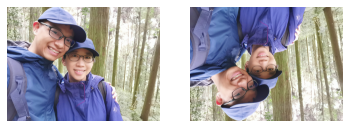

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

#original image
im = Image.open('./img/amanda.jpg')
ax1 = fig.add_subplot(121)
ax1.imshow(im)

#flipped image
im2 = np.flipud(im)
ax2 = fig.add_subplot(122)
ax2.imshow(im2)

ax1.axis('off') # turn off axis
ax2.axis('off')
plt.show()

## left-right (non mutating) using numpy.fliplr(image)

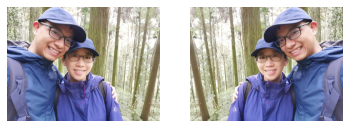

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

#original image
im = Image.open('./img/amanda.jpg')
ax1 = fig.add_subplot(121)
ax1.imshow(im)

#flipped image
im2 = np.fliplr(im)
ax2 = fig.add_subplot(122)
ax2.imshow(im2)

ax1.axis('off') # turn off axis
ax2.axis('off')
plt.show()

In [3]:
# how npflip works:

import numpy as np
arr1 = np.arange(1,49).reshape(4,4,3)
print(arr1)
print('-'*70)

print('np.flipud')
print(np.flipud(arr1))

print('-'*70)

print('np.fliplr')
print(np.fliplr(arr1))

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]

 [[25 26 27]
  [28 29 30]
  [31 32 33]
  [34 35 36]]

 [[37 38 39]
  [40 41 42]
  [43 44 45]
  [46 47 48]]]
----------------------------------------------------------------------
np.flipud
[[[37 38 39]
  [40 41 42]
  [43 44 45]
  [46 47 48]]

 [[25 26 27]
  [28 29 30]
  [31 32 33]
  [34 35 36]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]]
----------------------------------------------------------------------
np.fliplr
[[[10 11 12]
  [ 7  8  9]
  [ 4  5  6]
  [ 1  2  3]]

 [[22 23 24]
  [19 20 21]
  [16 17 18]
  [13 14 15]]

 [[34 35 36]
  [31 32 33]
  [28 29 30]
  [25 26 27]]

 [[46 47 48]
  [43 44 45]
  [40 41 42]
  [37 38 39]]]


### note: np.array (copy original) vs np.asarray (altered original)

# Image Rotation

## [Recommended!]  .transpose (non mutating)
### rotate with canvas  , does flip as well

In [4]:
from PIL import Image
image = Image.open('./img/amanda.jpg').convert('RGB')
img3 = image.copy()
img3.save('original.jpg')
img4 = img3.transpose(Image.ROTATE_90)
img4.save('transpose-ROTATE_90.jpg')
img4 = img3.transpose(Image.FLIP_LEFT_RIGHT)
img4.save('transpose-FLIP_LEFT_RIGHT.jpg')

## .rotate(degree, filter)
### note!!! using .rotate simply rotate without changing the canvas!

In [5]:
from PIL import Image
image = Image.open('./img/amanda.jpg').convert('RGB')
img3 = image.copy()
img3.save('original.jpg')
img4 = img3.rotate(45,Image.NEAREST) #size retain
img4.save('rotate-nearest.jpg')
img4 = img3.rotate(45,Image.BICUBIC) #size drop
img4.save('rotate-bicubic.jpg')
img4 = img3.rotate(45,Image.BILINEAR) #size retain
img4.save('rotate-bilinear.jpg')

## direct transpose

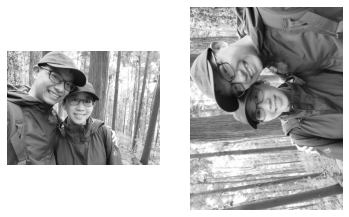

In [6]:
#transpose = lr flip, then rotate counterclockwise

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

#original image
im = Image.open('./img/amanda.jpg').convert('L') #note: transpose has to work in grayscale due to number of dimension
ax1 = fig.add_subplot(121)
ax1.imshow(im,cmap='gray') # note: matplotlib may render greyscale in RGB, so have to add cmap='gray'.

#transposed image
im2 = np.transpose(im)
ax2 = fig.add_subplot(122)
ax2.imshow(im2,cmap='gray')

ax1.axis('off') # turn off axis
ax2.axis('off')
plt.show()

# Resizing (non mutating)|

In [16]:
from PIL import Image
image = Image.open('./img/amanda.jpg').convert('RGB')
print(image.size)

img3 = image.copy()
img3.save('original.jpg')
img4 = img3.resize((2400,1800),Image.ANTIALIAS) #quality indistinguishable from Lanczos, slightly brighter
img4.save('resize-antialias.jpg')
img4 = img3.resize((2400,1800),Image.NEAREST) #(DONT USE)largest size! image super squarish! but Best Performance!
img4.save('resize-nearest.jpg')
img4 = img3.resize((2400,1800),Image.HAMMING) #(DONT USE)larger size, image appear squarish
img4.save('resize-hamming.jpg')
img4 = img3.resize((2400,1800),Image.BILINEAR) #size smallest, slightly blur
img4.save('resize-bilinear.jpg')
img4 = img3.resize((2400,1800),Image.BICUBIC) #size smaller, slightly blur - default
img4.save('resize-bicubic.jpg')
img4 = img3.resize((2400,1800),Image.LANCZOS) #image sharper, size same as antialias
img4.save('resize-lanczos.jpg')

(2364, 1773)


## Thumbnail (mutating)
only do scaled downsizing. faster than resizing

In [17]:
img3.thumbnail((400,100))  
img3.save('thumbnail.jpg')

#Note that this function modifies the Image object in place!!!!
#If you need to use the full resolution image as well, apply this method to a copy() of the original image.

img5 = img4.copy()
img5.thumbnail((400,100)) #note: if original image dimension does not match 400,100 , 
#computer uses the lower number(100) as fixed, then resize proportionately

In [19]:
# create thumbnail for whole folder
from PIL import Image
import glob, os

size = 128, 128

for infile in glob.glob("*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    im.thumbnail(size)
    im.save(file + "thumbnail.jpg", "JPEG")

## Crop (non mutating - copying a cropped version)

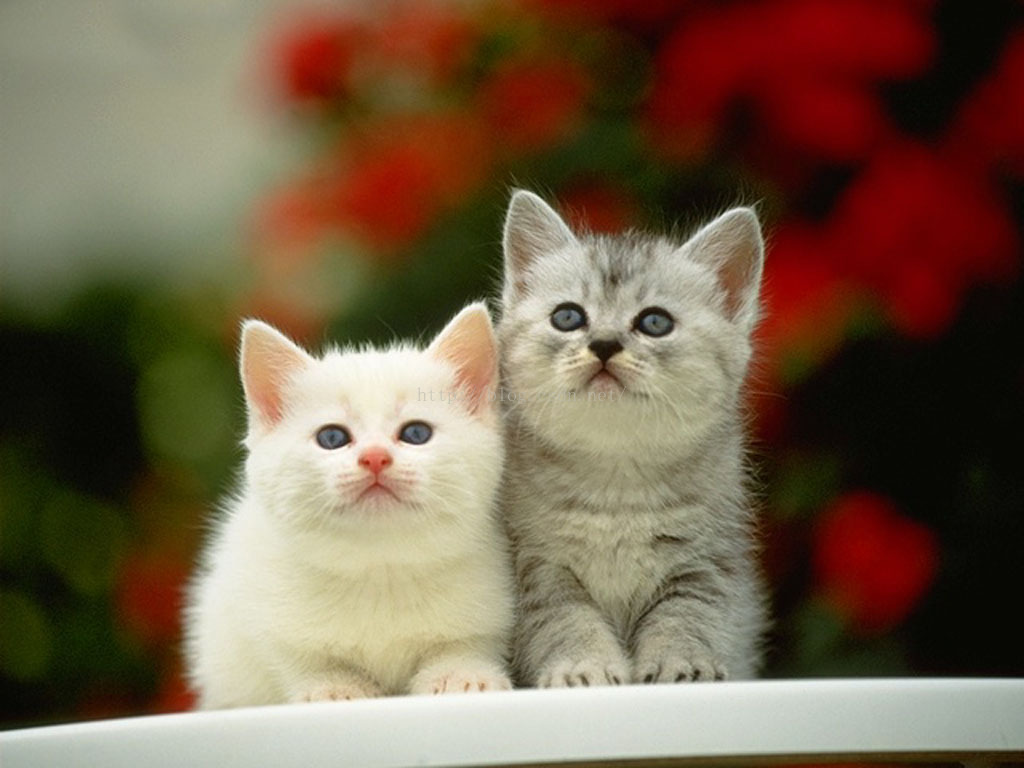

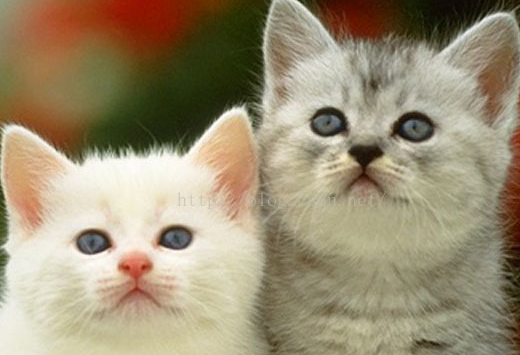

In [20]:
from PIL import Image
im=Image.open('./img/cat.jpg').convert("RGB")
box=(240,195,760,550)    # left, top, right(from left), bottom(from top)  ==> right>left, bottom>top
image_crop = im.crop(box)
display(im, image_crop) #display!!!!

## Paste() (mutating)
paste image into another image

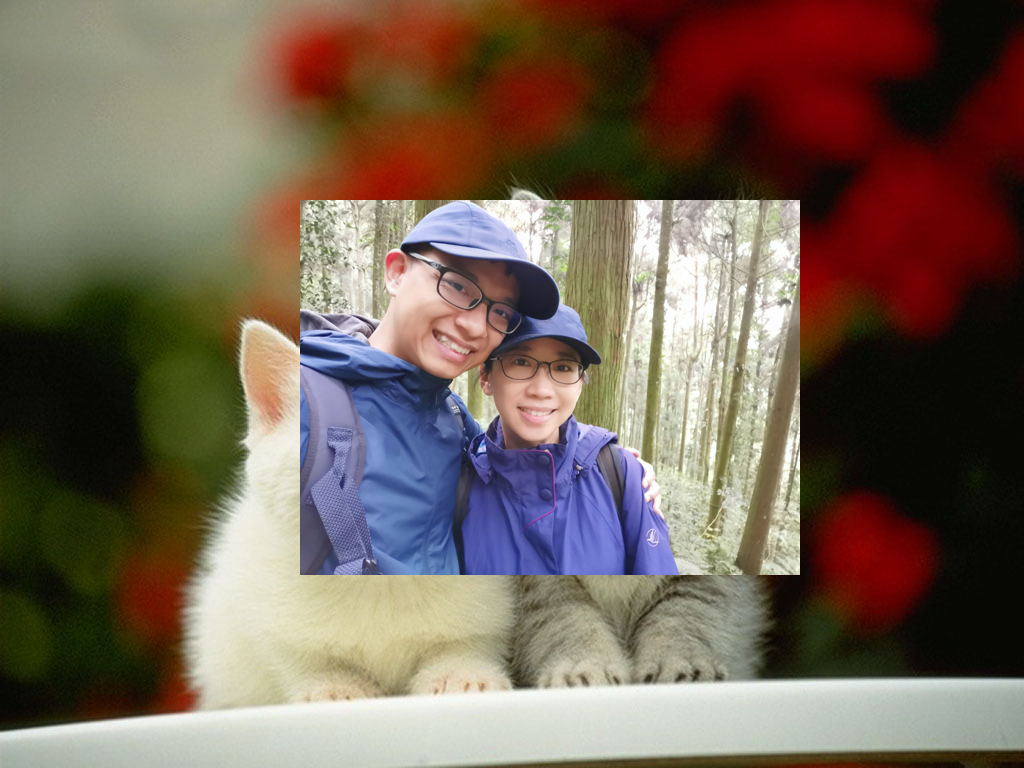

In [21]:
from PIL import Image

img = Image.open('./img/cat.jpg')
img2 = Image.open('./img/amanda.jpg')
img2.thumbnail((500,500))
img.paste(img2,(300,200)) # paste location left, top of leftcorner 
img # paste directly mutates original image

## how to find coordinates of a point in Image?
use matplotlib

<IPython.core.display.Javascript object>


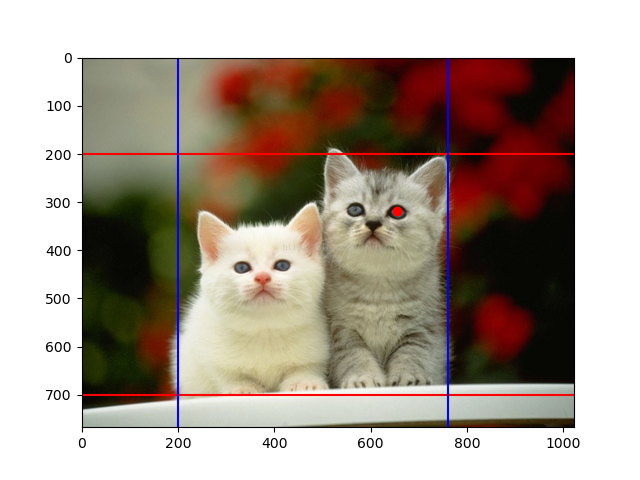

In [13]:
%matplotlib notebook  
# use notebook to read off cursor coordinate directly!
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('./img/cat.jpg').convert('RGB')

plt.imshow(im)
plt.plot(655,318,'ro')
plt.axhline(200,0,1,c='r')
plt.axhline(700,0,1,c='r')
plt.axvline(200,0,1,c='b')
plt.axvline(760,0,1,c='b')
plt.show()

## crop puzzle image

In [14]:
from PIL import Image
import numpy as np
im = Image.open('./img/cat.jpg').convert('RGB')
img_size = im.size # use image dimension, diving into segments
print(img_size)
xx = 3 ; yy = 2 # xx = number of vertical strips, yy = number of horizontal strips
seg_x = img_size[0] / xx # its ok to cut using float number
seg_y = img_size[1] / yy 

imarr = []

for i in range(xx):
    for j in range(yy):
        imarr.append(im.crop((seg_x * i , seg_y * j, seg_x * (i+1) , seg_y * (j+1))))
imarr

(1024, 768)


[<PIL.Image.Image image mode=RGB size=341x384 at 0x1EF550A9E80>,
 <PIL.Image.Image image mode=RGB size=341x384 at 0x1EF550A9C70>,
 <PIL.Image.Image image mode=RGB size=342x384 at 0x1EF548CA790>,
 <PIL.Image.Image image mode=RGB size=342x384 at 0x1EF5078FB20>,
 <PIL.Image.Image image mode=RGB size=341x384 at 0x1EF550A45B0>,
 <PIL.Image.Image image mode=RGB size=341x384 at 0x1EF54CFF430>]

<IPython.core.display.Javascript object>


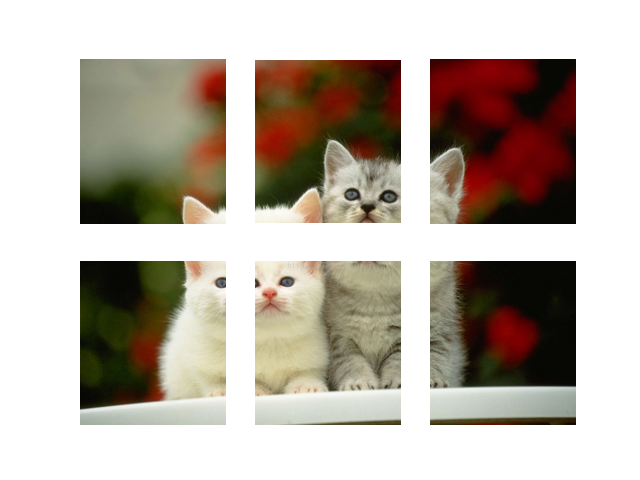

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(yy,xx)
count = 0
for i in range(xx):
    for j in range(yy):
        ax[j,i].imshow(imarr[count])
        ax[j,i].axis('off')
        count += 1
fig.show()